In [351]:
# Importando bibliotecas
%matplotlib inline 
import numpy as np
import pandas as pd# Case Terceira Fase - Insper Júnior
import os
import matplotlib as plt
from IPython.display import display
import math
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score # importando a biblioteca para calcular a acurácia
import seaborn as sns

In [352]:

import warnings

warnings.filterwarnings('ignore')

In [353]:
# Verificando se a base de dados está na pasta
filename = 'Base - MindMiners.xlsx'

if filename in os.listdir():
    print(f'Parece que o arquivo {filename} está na mesma pasta do notebook!')
    
else:
    print(f'Não encontrei o arquivo {filename}')

Parece que o arquivo Base - MindMiners.xlsx está na mesma pasta do notebook!


In [354]:
df = pd.read_excel('Base - MindMiners.xlsx',sheet_name = 'Pesquisa-Respostas')

In [355]:
df.columns = df.columns.str.strip()

In [356]:
df["P7"] = df[".P7"]
df = df.drop([".P7"], axis=1)

In [357]:
df["P20"] = df[".P20"]
df = df.drop([".P20"], axis=1)

In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 86 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   0 non-null      float64
 1   P1           991 non-null    float64
 2   P2           995 non-null    object 
 3   P3           994 non-null    float64
 4   P4           994 non-null    float64
 5   Unnamed: 5   111 non-null    float64
 6   P5           994 non-null    object 
 7   P6           992 non-null    object 
 8   P8           992 non-null    float64
 9   P9           992 non-null    object 
 10  Unnamed: 11  111 non-null    float64
 11  P10          991 non-null    float64
 12  P11          991 non-null    float64
 13  P12          992 non-null    object 
 14  P13          992 non-null    float64
 15  Unnamed: 16  111 non-null    float64
 16  P14          992 non-null    float64
 17  P15          991 non-null    float64
 18  Unnamed: 19  111 non-null    float64
 19  P16   

In [359]:
df.isnull().sum()

Unnamed: 0    1268
P1             277
P2             273
P3             274
P4             274
              ... 
Qreg           277
Qclasse        277
Qs             302
P7             275
P20            277
Length: 86, dtype: int64

In [360]:
df["P1"].value_counts(dropna=False)
    

1.0    448
2.0    294
NaN    277
4.0    186
3.0     17
6.0     17
5.0     16
7.0     13
Name: P1, dtype: int64

In [361]:
df_dropped = df.loc[:,["P1","P2","P3","P4","P5","P6","P7","P8","P9","P10","P11","P12","P13","P14","P15","P16","P17","P18","P19","P20","P21","P22","P23","P24","P25","P26","P27","P28","P29","P30","P31","P32","P33","P34","P35","P36","P37","P38","P39","P40","P41","P42","P43","P44","P45","P46","P47","P48","P49","P50","P51","P52","P53","P54","P55","P56","P57","P58","Qesc","Qciv","Qnat","Qtipcama","Qcama","Qest","Qche","Qocup","Qid","Qgen","Qreg","Qclasse"]]

In [362]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 70 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   P1        991 non-null    float64
 1   P2        995 non-null    object 
 2   P3        994 non-null    float64
 3   P4        994 non-null    float64
 4   P5        994 non-null    object 
 5   P6        992 non-null    object 
 6   P7        993 non-null    object 
 7   P8        992 non-null    float64
 8   P9        992 non-null    object 
 9   P10       991 non-null    float64
 10  P11       991 non-null    float64
 11  P12       992 non-null    object 
 12  P13       992 non-null    float64
 13  P14       992 non-null    float64
 14  P15       991 non-null    float64
 15  P16       992 non-null    float64
 16  P17       991 non-null    float64
 17  P18       991 non-null    object 
 18  P19       991 non-null    object 
 19  P20       991 non-null    object 
 20  P21       991 non-null    obje

In [363]:
# Retirando linhas com algum valor nulo
df_dropped_NA = df_dropped.dropna(how = "any")

#Verificando nova base sem valores a serem preenchidos
df_dropped_NA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980 entries, 0 to 1267
Data columns (total 70 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   P1        980 non-null    float64
 1   P2        980 non-null    object 
 2   P3        980 non-null    float64
 3   P4        980 non-null    float64
 4   P5        980 non-null    object 
 5   P6        980 non-null    object 
 6   P7        980 non-null    object 
 7   P8        980 non-null    float64
 8   P9        980 non-null    object 
 9   P10       980 non-null    float64
 10  P11       980 non-null    float64
 11  P12       980 non-null    object 
 12  P13       980 non-null    float64
 13  P14       980 non-null    float64
 14  P15       980 non-null    float64
 15  P16       980 non-null    float64
 16  P17       980 non-null    float64
 17  P18       980 non-null    object 
 18  P19       980 non-null    object 
 19  P20       980 non-null    object 
 20  P21       980 non-null    objec

In [364]:
df_dropped_NA["Qreg"].value_counts(dropna=False)

2.0    279
1.0    269
3.0    153
4.0    142
5.0    137
Name: Qreg, dtype: int64

In [365]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

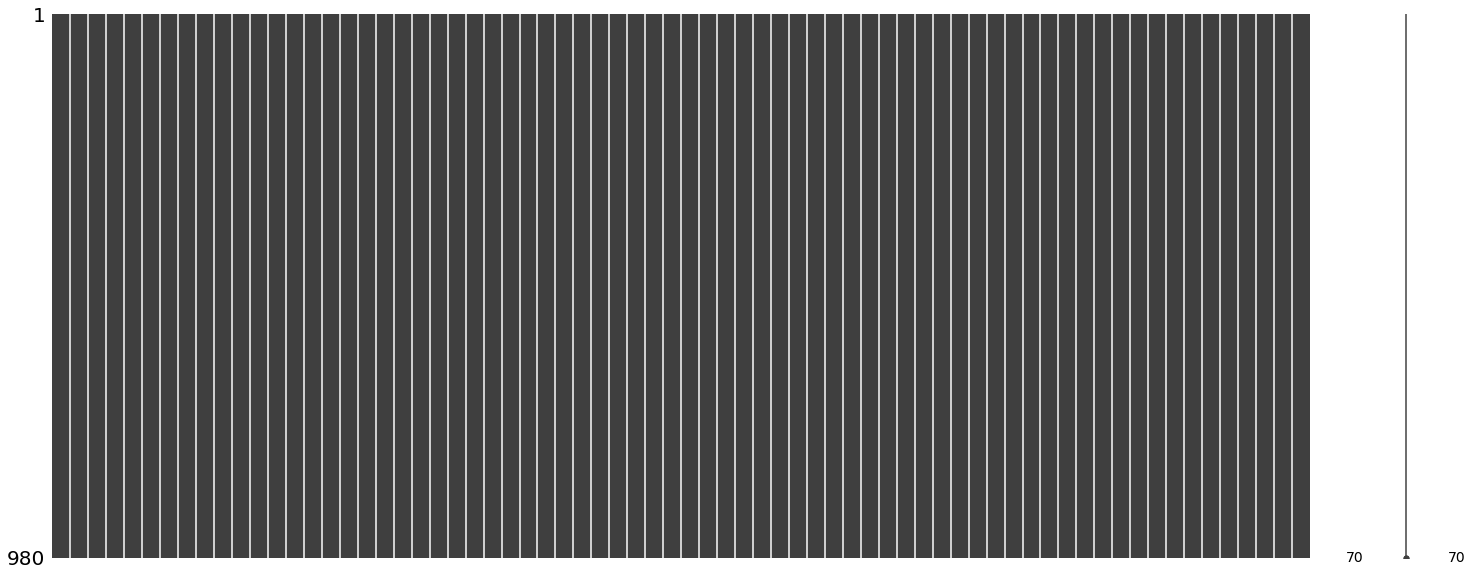

In [366]:
# Instalando biblioteca missingno para visualização de valores nulos e importando
import missingno as msno

#Visualizando espaçamento dos valores nulos nas colunas pela função matrix()
msno.matrix(df_dropped_NA)

In [367]:
df_dropped_NA["P1"] = df_dropped_NA["P1"].replace([7.0,6.0],[3,2])
df_dropped_NA["P1"].value_counts(dropna=False)

1.0    442
2.0    306
4.0    186
3.0     30
5.0     16
Name: P1, dtype: int64

In [368]:
df_dropped_NA["P6"] = df_dropped_NA["P6"].replace([" "],[0])
df_dropped_NA["P6"][df_dropped_NA["P6"] == 0] = np.nan
df_dropped_NA["P6"].value_counts(dropna=False)

6.0    186
2.0    176
7.0    173
5.0    143
3.0    103
1.0    101
4.0     97
NaN      1
Name: P6, dtype: int64

In [369]:
df_dropped_NA['P18']=df_dropped_NA['P18'].astype(str)
df_dropped_NA["P18"].value_counts(dropna=False)

1                      326
2                      324
7                       75
6                       68
5                       64
3                       63
4                       57
1900-01-05 00:00:00      2
1900-01-01 00:00:00      1
Name: P18, dtype: int64

In [370]:
df_dropped_NA["P18"] = df_dropped_NA["P18"].replace(["1900-01-05 00:00:00"],["5"])
df_dropped_NA["P18"] = df_dropped_NA["P18"].replace(["1900-01-01 00:00:00"],["1"])
df_dropped_NA["P18"].value_counts(dropna=False)

1    327
2    324
7     75
6     68
5     66
3     63
4     57
Name: P18, dtype: int64

In [371]:
df_dropped_NA['P19']=df_dropped_NA['P19'].astype(str)
df_dropped_NA["P19"] = df_dropped_NA["P19"].replace(["1900-01-03 00:00:00"],["3"])
df_dropped_NA["P19"] = df_dropped_NA["P19"].replace(["1900-01-06 00:00:00"],["6"])
df_dropped_NA["P19"].value_counts(dropna=False)

7    373
5    195
6    177
3    110
2    101
4     12
1     12
Name: P19, dtype: int64

In [372]:
df_dropped_NA['P20']=df_dropped_NA['P20'].astype(str)
df_dropped_NA["P20"] = df_dropped_NA["P20"].replace(["1900-01-01 00:00:00"],["1"])
df_dropped_NA["P20"] = df_dropped_NA["P20"].replace(["1900-01-04 00:00:00"],["4"])
df_dropped_NA["P20"].value_counts(dropna=False)

5    160
3    156
6    150
4    150
2    131
7    127
1    106
Name: P20, dtype: int64

In [373]:
df_dropped_NA['P21']=df_dropped_NA['P21'].astype(str)
df_dropped_NA["P21"] = df_dropped_NA["P21"].replace(["1900-01-02 00:00:00"],["2"])
df_dropped_NA["P21"] = df_dropped_NA["P21"].replace(["1900-01-03 00:00:00"],["3"])
df_dropped_NA["P21"] = df_dropped_NA["P21"].replace(["1900-01-04 00:00:00"],["4"])
df_dropped_NA["P21"] = df_dropped_NA["P21"].replace(["1900-01-06 00:00:00"],["6"])
df_dropped_NA["P21"] = df_dropped_NA["P21"].replace(["1900-01-07 00:00:00"],["7"])
df_dropped_NA["P21"].value_counts(dropna=False)

4    176
1    176
3    172
2    168
5    108
7     90
6     90
Name: P21, dtype: int64

In [374]:
df_dropped_NA['P22']=df_dropped_NA['P22'].astype(str)
df_dropped_NA["P22"] = df_dropped_NA["P22"].replace(["1900-01-01 00:00:00"],["1"])
df_dropped_NA["P22"] = df_dropped_NA["P22"].replace(["1900-01-03 00:00:00"],["3"])
df_dropped_NA["P22"] = df_dropped_NA["P22"].replace(["1900-01-07 00:00:00"],["7"])
df_dropped_NA["P22"].value_counts(dropna=False)

3    188
1    170
2    162
4    152
6    106
5    103
7     99
Name: P22, dtype: int64

In [375]:
df_dropped_NA['P23']=df_dropped_NA['P23'].astype(str)
df_dropped_NA["P23"] = df_dropped_NA["P23"].replace(["1900-01-05 00:00:00"],["5"])
df_dropped_NA["P23"] = df_dropped_NA["P23"].replace(["1900-01-02 00:00:00"],["2"])
df_dropped_NA["P23"] = df_dropped_NA["P23"].replace(["1900-01-01 00:00:00"],["1"])
df_dropped_NA["P23"].value_counts(dropna=False)

5    411
6    175
7    164
1    104
2    100
3     14
4     12
Name: P23, dtype: int64

In [376]:
df_dropped_NA["P43"] = df_dropped_NA["P43"].replace([1234567890987650000],[0])
df_dropped_NA["P43"][df_dropped_NA["P43"] == 0] = np.nan
df_dropped_NA["P43"].value_counts(dropna=False)

5.0    156
3.0    154
1.0    153
2.0    139
7.0    127
6.0    127
4.0    123
NaN      1
Name: P43, dtype: int64

In [377]:
df_dropped_NA["P55"] = df_dropped_NA["P55"].replace([1.23456789098765e+36],[0])
df_dropped_NA["P55"][df_dropped_NA["P55"] == 0] = np.nan
df_dropped_NA["P55"].value_counts(dropna=False)

2.0    158
7.0    150
4.0    146
6.0    140
5.0    132
1.0    131
3.0    122
NaN      1
Name: P55, dtype: int64

In [378]:
df_dropped_NA["Qesc"] = df_dropped_NA["Qesc"].replace([7],[6])

df_dropped_NA["Qesc"].value_counts(dropna=False)

6.0    263
5.0    261
4.0    126
3.0    113
1.0    110
2.0    107
Name: Qesc, dtype: int64

In [379]:
df_dropped_NA["Qnat"][df_dropped_NA["Qnat"] > 12] = np.nan
df_dropped_NA["Qnat"] = df_dropped_NA["Qnat"].replace([0,1,2,3,4],[1,2,2,3,3])
df_dropped_NA["Qnat"][df_dropped_NA["Qnat"] >= 5] = 4
df_dropped_NA["Qnat"].value_counts(dropna=False)
# 1-(0 filhos), 2-(1-2 filhos), 3 -(3-4 filhos), 4-(5+ filhos)

2.0    416
3.0    242
1.0    168
4.0    140
NaN     14
Name: Qnat, dtype: int64

In [380]:
df_dropped_NA["Qcama"][df_dropped_NA["Qcama"] > 12] = np.nan
df_dropped_NA["Qcama"].value_counts(dropna=False)

1.0     404
3.0     152
4.0     139
2.0     132
0.0      48
5.0      48
9.0      14
8.0      14
6.0      13
7.0       9
10.0      6
NaN       1
Name: Qcama, dtype: int64

In [381]:
df_dropped_NA["Qche"] = df_dropped_NA["Qche"].replace(["quinta-Feira","Quinta Feira","quintaFeira"],["Quinta-Feira","Quinta-Feira","Quinta-Feira"])
df_dropped_NA["Qche"].value_counts(dropna=False)

Quinta-Feira     329
Terça-Feira      205
Sexta-Feira      186
Quarta-Feira     132
Sábado            51
Segunda-Feira     46
Domingo           31
Name: Qche, dtype: int64

In [382]:
df_dropped_NA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980 entries, 0 to 1267
Data columns (total 70 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   P1        980 non-null    float64
 1   P2        980 non-null    object 
 2   P3        980 non-null    float64
 3   P4        980 non-null    float64
 4   P5        980 non-null    object 
 5   P6        979 non-null    float64
 6   P7        980 non-null    object 
 7   P8        980 non-null    float64
 8   P9        980 non-null    object 
 9   P10       980 non-null    float64
 10  P11       980 non-null    float64
 11  P12       980 non-null    object 
 12  P13       980 non-null    float64
 13  P14       980 non-null    float64
 14  P15       980 non-null    float64
 15  P16       980 non-null    float64
 16  P17       980 non-null    float64
 17  P18       980 non-null    object 
 18  P19       980 non-null    object 
 19  P20       980 non-null    object 
 20  P21       980 non-null    objec

In [383]:
df_limpo = df_dropped_NA.dropna(how = "any")
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 962 entries, 0 to 1266
Data columns (total 70 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   P1        962 non-null    float64
 1   P2        962 non-null    object 
 2   P3        962 non-null    float64
 3   P4        962 non-null    float64
 4   P5        962 non-null    object 
 5   P6        962 non-null    float64
 6   P7        962 non-null    object 
 7   P8        962 non-null    float64
 8   P9        962 non-null    object 
 9   P10       962 non-null    float64
 10  P11       962 non-null    float64
 11  P12       962 non-null    object 
 12  P13       962 non-null    float64
 13  P14       962 non-null    float64
 14  P15       962 non-null    float64
 15  P16       962 non-null    float64
 16  P17       962 non-null    float64
 17  P18       962 non-null    object 
 18  P19       962 non-null    object 
 19  P20       962 non-null    object 
 20  P21       962 non-null    objec

In [384]:
df_limpo["P2"] = df_limpo["P2"].astype(float)
df_limpo["P5"] = df_limpo["P5"].astype(float)
df_limpo["P7"] = df_limpo["P7"].astype(float)
df_limpo["P9"] = df_limpo["P9"].astype(float)
df_limpo["P12"] = df_limpo["P12"].astype(float)
df_limpo["P18"] = df_limpo["P18"].astype(float)
df_limpo["P19"] = df_limpo["P19"].astype(float)
df_limpo["P20"] = df_limpo["P20"].astype(float)
df_limpo["P21"] = df_limpo["P21"].astype(float)
df_limpo["P22"] = df_limpo["P22"].astype(float)
df_limpo["P23"] = df_limpo["P23"].astype(float)
df_limpo["Qesc"] = df_limpo["Qesc"].astype(object)
df_limpo["Qocup"] = df_limpo["Qocup"].astype(object)
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 962 entries, 0 to 1266
Data columns (total 70 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   P1        962 non-null    float64
 1   P2        962 non-null    float64
 2   P3        962 non-null    float64
 3   P4        962 non-null    float64
 4   P5        962 non-null    float64
 5   P6        962 non-null    float64
 6   P7        962 non-null    float64
 7   P8        962 non-null    float64
 8   P9        962 non-null    float64
 9   P10       962 non-null    float64
 10  P11       962 non-null    float64
 11  P12       962 non-null    float64
 12  P13       962 non-null    float64
 13  P14       962 non-null    float64
 14  P15       962 non-null    float64
 15  P16       962 non-null    float64
 16  P17       962 non-null    float64
 17  P18       962 non-null    float64
 18  P19       962 non-null    float64
 19  P20       962 non-null    float64
 20  P21       962 non-null    float

In [385]:
df_limpo["P2"] = df_limpo["P2"].replace([1,2,3,4,5,6,7,8],["Visitar_amigos","Visitar_familia","Lazer","Pesquisa_Científica","Trabalho", "Viagem_gastronômica","Desconectar","Não_viajei"])
df_limpo["Qesc"] = df_limpo["Qesc"].replace([1,2,3,4,5,6],["EF_incompleto","EF_completo","EM_incompleto","EM_completo","ES_incompleto", "ES_completo"])
df_limpo["Qciv"] = df_limpo["Qciv"].replace([1,2,3,4,5],["Solteiro","Casado","Separado","Divorciado","Viúvo"])
df_limpo["Qocup"] = df_limpo["Qocup"].replace([1,2,3,4,5,6],["Meio_tempo","Tempo_integral","Desempregado","Autonomo","Estudante", "Aposentado"])
df_limpo["Qid"] = df_limpo["Qid"].replace([1,2,3,4,5,6],["-18","18-24","25-34","35-44","45-54", "55+"])
df_limpo["Qgen"] = df_limpo["Qgen"].replace([1,2],["Masculino","Feminino"])
df_limpo["Qreg"] = df_limpo["Qreg"].replace([1,2,3,4,5],["Sudeste","Sul","Centro_Oeste","Nordeste","Norte"])

In [386]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 962 entries, 0 to 1266
Data columns (total 70 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   P1        962 non-null    float64
 1   P2        962 non-null    object 
 2   P3        962 non-null    float64
 3   P4        962 non-null    float64
 4   P5        962 non-null    float64
 5   P6        962 non-null    float64
 6   P7        962 non-null    float64
 7   P8        962 non-null    float64
 8   P9        962 non-null    float64
 9   P10       962 non-null    float64
 10  P11       962 non-null    float64
 11  P12       962 non-null    float64
 12  P13       962 non-null    float64
 13  P14       962 non-null    float64
 14  P15       962 non-null    float64
 15  P16       962 non-null    float64
 16  P17       962 non-null    float64
 17  P18       962 non-null    float64
 18  P19       962 non-null    float64
 19  P20       962 non-null    float64
 20  P21       962 non-null    float

------
## Criação de variável

In [387]:
df_limpo["P1"] = df_limpo["P1"].replace([5.0],[0])
df_limpo["P1"].value_counts()

1.0    437
2.0    300
4.0    183
3.0     29
0.0     13
Name: P1, dtype: int64

In [388]:
df_limpo["Qdias"] = df_limpo["P1"]* df_limpo["Qest"]
df_limpo["Qdias"].value_counts() 

4.0     244
6.0     208
3.0     175
8.0     169
12.0    130
2.0      14
0.0      13
9.0       5
16.0      3
1.0       1
Name: Qdias, dtype: int64

# Variavel qualitativa para quantitativa

In [389]:
# Importando do sklearn para aplicação do OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
#from seaborn import load_dataset




transformer = make_column_transformer(
    (OneHotEncoder(), ['P2',"Qesc","Qciv","Qtipcama","Qche","Qocup","Qid","Qgen","Qreg","Qclasse"]),
    remainder='passthrough')
#"Qclasse

transformed = transformer.fit_transform(df_limpo)
df_to_model = pd.DataFrame(transformed, columns=transformer.get_feature_names())
df_to_model

,onehotencoder__x0_Desconectar,onehotencoder__x0_Lazer,onehotencoder__x0_Pesquisa_Científica,onehotencoder__x0_Trabalho,onehotencoder__x0_Viagem_gastronômica,onehotencoder__x0_Visitar_amigos,onehotencoder__x0_Visitar_familia,onehotencoder__x1_EF_completo,onehotencoder__x1_EF_incompleto,onehotencoder__x1_EM_completo,...,P53,P54,P55,P56,P57,P58,Qnat,Qcama,Qest,Qdias
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,4.0,1.0,2.0,5.0,5.0,1.0,1.0,4.0,8.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,3.0,4.0,3.0,2.0,2.0,1.0,2.0,1.0,1.0,3.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,7.0,6.0,7.0,5.0,7.0,1.0,1.0,3.0,3.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,5.0,4.0,2.0,6.0,4.0,3.0,1.0,6.0,6.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,5.0,2.0,3.0,2.0,5.0,2.0,1.0,4.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,1.0,4.0,4.0,1.0,2.0,1.0,4.0,8.0
958,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,7.0,5.0,1.0,4.0,7.0,3.0,6.0,2.0,6.0
959,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,5.0,6.0,1.0,7.0,4.0,2.0,2.0,6.0,12.0
960,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,7.0,5.0,2.0,7.0,1.0,2.0,3.0,6.0


In [390]:
y = df_to_model.loc[:,"P1"]
X = df_to_model.drop(["Qdias","P1","P4","P5","P6","P7","P8","P9","P10","P11","P12","P13","P14","P15","P16","P17","P18","P19","P20","P21","P22","P23","P24","P26","P27","P28","P29","P30","P32","P33","P34","P35","P36","P37","P38","P39","P40","P41","P42","P43","P44","P45","P46","P47","P48","P49","P50","P51","P52","P53","P54","P55","P56","P57","P58"], axis=1)

In [391]:
target = df_to_model[['P1']]
df_teste = df_to_model.drop(["Qdias","P1","P4","P5","P6","P7","P8","P9","P10","P11","P12","P13","P14","P15","P16","P17","P18","P19","P20","P21","P22","P23","P24","P26","P27","P28","P29","P30","P32","P33","P34","P35","P36","P37","P38","P39","P40","P41","P42","P43","P44","P45","P46","P47","P48","P49","P50","P51","P52","P53","P54","P55","P56","P57","P58"], axis=1)

------

# Clusterização


In [392]:
# Importando do sklearn para aplicação do OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
#from seaborn import load_dataset




transformer = make_column_transformer(
    (OneHotEncoder(), ['P2',"Qesc","Qciv","Qocup","Qid","Qgen","Qreg","Qclasse"]),
    remainder='passthrough')
#"Qclasse

transformed = transformer.fit_transform(df_limpo)
df_to_model_2 = pd.DataFrame(transformed, columns=transformer.get_feature_names())
df_to_model_2

,onehotencoder__x0_Desconectar,onehotencoder__x0_Lazer,onehotencoder__x0_Pesquisa_Científica,onehotencoder__x0_Trabalho,onehotencoder__x0_Viagem_gastronômica,onehotencoder__x0_Visitar_amigos,onehotencoder__x0_Visitar_familia,onehotencoder__x1_EF_completo,onehotencoder__x1_EF_incompleto,onehotencoder__x1_EM_completo,...,P55,P56,P57,P58,Qnat,Qtipcama,Qcama,Qest,Qche,Qdias
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,5.0,5.0,1.0,Viuvo,1.0,4.0,Sábado,8.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,3.0,2.0,2.0,1.0,2.0,Solteiro,1.0,1.0,Quinta-Feira,3.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,7.0,5.0,7.0,1.0,Viuvo,1.0,3.0,Sábado,3.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,6.0,4.0,3.0,Casado,1.0,6.0,Terça-Feira,6.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.0,2.0,5.0,2.0,Casado,1.0,4.0,Quinta-Feira,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,4.0,1.0,2.0,Viuvo,1.0,4.0,Quinta-Feira,8.0
958,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,1.0,4.0,7.0,3.0,Solteiro,6.0,2.0,Terça-Feira,6.0
959,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,6.0,1.0,7.0,4.0,2.0,Solteiro,2.0,6.0,Domingo,12.0
960,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,5.0,2.0,7.0,1.0,Casado,2.0,3.0,Quinta-Feira,6.0


In [393]:
X_cl = df_to_model_2.drop(["Qdias","Qche","Qest","Qtipcama","Qcama","P4","P5","P6","P7","P8","P9","P10","P11","P12","P13","P14","P15","P16","P17","P18","P19","P20","P21","P22","P23","P24","P26","P27","P28","P29","P30","P32","P33","P34","P35","P36","P37","P38","P39","P40","P41","P42","P43","P44","P45","P46","P47","P48","P49","P50","P51","P52","P53","P54","P55","P56","P58"], axis=1)



In [394]:
X_k = X_cl

In [395]:
X_k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 46 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   onehotencoder__x0_Desconectar          962 non-null    object
 1   onehotencoder__x0_Lazer                962 non-null    object
 2   onehotencoder__x0_Pesquisa_Científica  962 non-null    object
 3   onehotencoder__x0_Trabalho             962 non-null    object
 4   onehotencoder__x0_Viagem_gastronômica  962 non-null    object
 5   onehotencoder__x0_Visitar_amigos       962 non-null    object
 6   onehotencoder__x0_Visitar_familia      962 non-null    object
 7   onehotencoder__x1_EF_completo          962 non-null    object
 8   onehotencoder__x1_EF_incompleto        962 non-null    object
 9   onehotencoder__x1_EM_completo          962 non-null    object
 10  onehotencoder__x1_EM_incompleto        962 non-null    object
 11  onehotencoder__x1_E

------

## Kmeans

In [396]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0) 

kmeans.fit(X_k)

KMeans(n_clusters=4, random_state=0)

In [397]:
kmeans.fit_predict(X_k)

array([1, 2, 0, 0, 3, 2, 3, 2, 0, 1, 2, 0, 3, 1, 2, 0, 3, 2, 0, 2, 1, 1,
       1, 0, 0, 3, 2, 3, 3, 1, 0, 0, 2, 0, 1, 3, 2, 2, 1, 2, 1, 0, 1, 2,
       2, 1, 1, 1, 1, 0, 3, 2, 0, 0, 3, 0, 2, 0, 2, 1, 0, 3, 2, 0, 2, 2,
       2, 2, 3, 2, 3, 0, 2, 0, 3, 1, 2, 1, 1, 0, 0, 0, 3, 3, 0, 3, 0, 0,
       3, 1, 0, 0, 1, 1, 2, 2, 0, 3, 0, 3, 0, 1, 3, 1, 1, 0, 1, 3, 1, 2,
       3, 2, 3, 2, 2, 1, 1, 1, 1, 1, 1, 0, 3, 3, 1, 3, 1, 0, 1, 1, 2, 3,
       0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 0, 0, 0, 2, 2, 1, 2, 2, 0, 2, 2, 1,
       3, 1, 1, 2, 3, 2, 2, 0, 2, 3, 1, 3, 2, 0, 3, 1, 1, 2, 1, 1, 3, 2,
       2, 3, 1, 0, 1, 3, 3, 0, 1, 1, 0, 2, 0, 2, 3, 0, 1, 0, 1, 1, 1, 2,
       3, 0, 2, 2, 1, 2, 1, 0, 0, 1, 1, 0, 0, 2, 2, 0, 0, 3, 2, 0, 1, 2,
       1, 3, 2, 1, 0, 2, 0, 0, 2, 2, 1, 3, 2, 3, 2, 1, 0, 2, 0, 2, 0, 1,
       2, 3, 2, 3, 1, 0, 2, 0, 0, 2, 3, 1, 0, 2, 3, 3, 1, 3, 0, 2, 3, 2,
       0, 1, 1, 3, 2, 3, 2, 2, 0, 0, 2, 3, 0, 0, 1, 2, 1, 3, 0, 1, 0, 2,
       1, 3, 2, 0, 2, 3, 1, 1, 2, 0, 3, 0, 0, 2, 2,

In [398]:
centroids = kmeans.cluster_centers_

In [399]:
kmeans.inertia_

15013.570573048237

In [400]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 153 out of 962 samples were correctly labeled.


In [401]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.16


### Melhor número de clusters

In [402]:
#from sklearn.cluster import KMeans

#cs = []
#for i in range(1, 20):
    #cs.append(KMeans(n_clusters = i, max_iter = 10000, n_init = 100, random_state = 61658).fit(X_k).inertia_)
#plt.plot(range(1, 20), cs)
#plt.title('The Elbow Method')
#plt.xlabel('Number of clusters')
#plt.ylabel('CS')
#plt.show()

In [403]:
X_k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 46 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   onehotencoder__x0_Desconectar          962 non-null    object
 1   onehotencoder__x0_Lazer                962 non-null    object
 2   onehotencoder__x0_Pesquisa_Científica  962 non-null    object
 3   onehotencoder__x0_Trabalho             962 non-null    object
 4   onehotencoder__x0_Viagem_gastronômica  962 non-null    object
 5   onehotencoder__x0_Visitar_amigos       962 non-null    object
 6   onehotencoder__x0_Visitar_familia      962 non-null    object
 7   onehotencoder__x1_EF_completo          962 non-null    object
 8   onehotencoder__x1_EF_incompleto        962 non-null    object
 9   onehotencoder__x1_EM_completo          962 non-null    object
 10  onehotencoder__x1_EM_incompleto        962 non-null    object
 11  onehotencoder__x1_E

In [404]:
kmeans = KMeans(n_clusters=5, max_iter = 10000, n_init = 100, random_state = 61658) 
clus = kmeans.fit_predict(X_k)

df_limpo.loc[:, 'cluster'] = clus
df_limpo

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,Qcama,Qest,Qche,Qocup,Qid,Qgen,Qreg,Qclasse,Qdias,cluster
0,2.0,Desconectar,7.0,5.0,4.0,2.0,6.0,7.0,5.0,1.0,...,1.0,4.0,Sábado,Tempo_integral,55+,Masculino,Sul,B,8.0,3
1,3.0,Visitar_familia,2.0,6.0,4.0,2.0,5.0,1.0,3.0,2.0,...,1.0,1.0,Quinta-Feira,Tempo_integral,55+,Masculino,Norte,B,3.0,1
2,1.0,Desconectar,7.0,5.0,4.0,5.0,6.0,6.0,5.0,2.0,...,1.0,3.0,Sábado,Desempregado,35-44,Masculino,Sul,B,3.0,4
3,1.0,Lazer,4.0,4.0,6.0,6.0,1.0,7.0,6.0,6.0,...,1.0,6.0,Terça-Feira,Desempregado,-18,Feminino,Sul,B,6.0,4
4,2.0,Desconectar,6.0,7.0,3.0,3.0,7.0,6.0,5.0,2.0,...,1.0,4.0,Quinta-Feira,Aposentado,18-24,Masculino,Sul,A,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,2.0,Lazer,7.0,5.0,4.0,3.0,6.0,3.0,5.0,1.0,...,1.0,4.0,Quinta-Feira,Aposentado,45-54,Feminino,Sul,A,8.0,0
1262,3.0,Trabalho,3.0,6.0,7.0,6.0,4.0,4.0,7.0,2.0,...,6.0,2.0,Terça-Feira,Autonomo,25-34,Masculino,Centro_Oeste,A,6.0,1
1263,2.0,Lazer,7.0,6.0,6.0,6.0,2.0,4.0,7.0,5.0,...,2.0,6.0,Domingo,Estudante,45-54,Feminino,Sudeste,A,12.0,3
1265,2.0,Desconectar,6.0,6.0,4.0,5.0,6.0,6.0,5.0,1.0,...,2.0,3.0,Quinta-Feira,Autonomo,45-54,Feminino,Sudeste,A,6.0,0


In [405]:
df_to_model_2.loc[:, 'cluster'] = clus
df_to_model_2

,onehotencoder__x0_Desconectar,onehotencoder__x0_Lazer,onehotencoder__x0_Pesquisa_Científica,onehotencoder__x0_Trabalho,onehotencoder__x0_Viagem_gastronômica,onehotencoder__x0_Visitar_amigos,onehotencoder__x0_Visitar_familia,onehotencoder__x1_EF_completo,onehotencoder__x1_EF_incompleto,onehotencoder__x1_EM_completo,...,P56,P57,P58,Qnat,Qtipcama,Qcama,Qest,Qche,Qdias,cluster
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,5.0,5.0,1.0,Viuvo,1.0,4.0,Sábado,8.0,3
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,2.0,2.0,1.0,2.0,Solteiro,1.0,1.0,Quinta-Feira,3.0,1
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,5.0,7.0,1.0,Viuvo,1.0,3.0,Sábado,3.0,4
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,6.0,4.0,3.0,Casado,1.0,6.0,Terça-Feira,6.0,4
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,2.0,5.0,2.0,Casado,1.0,4.0,Quinta-Feira,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,1.0,2.0,Viuvo,1.0,4.0,Quinta-Feira,8.0,0
958,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,7.0,3.0,Solteiro,6.0,2.0,Terça-Feira,6.0,1
959,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,7.0,4.0,2.0,Solteiro,2.0,6.0,Domingo,12.0,3
960,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,2.0,7.0,1.0,Casado,2.0,3.0,Quinta-Feira,6.0,0


In [406]:
for col in df_limpo.drop('cluster', axis=1).columns:
    for cl in np.sort(df_limpo.cluster.unique()):
        if df_limpo.dtypes[col] == object:
            vc = 100*df_limpo.loc[df_limpo.cluster==cl,col].value_counts()/(df_limpo.cluster==cl).sum()
            for cat, cnt in vc.reset_index().values:
                print(f'{cl:d}; {col}_{str(cat):s}; {cnt:5.2f}%'.replace('.', ','))
        else:      
            print(f'{cl:d}; {col};{df_limpo.loc[df_limpo.cluster==cl, col].mean():.2f}'.replace('.', ','))
            
for col in df_limpo.drop('cluster', axis=1).columns:
    if df_limpo.dtypes[col] == object:
        vc = 100*df_limpo.loc[:, col].value_counts()/(df_limpo.shape[0])
        for cat, cnt in vc.reset_index().values:
            print(f'All; {col}_{str(cat):s}; {cnt:5.2f}%'.replace('.', ','))
    else:      
        print(f'All; {col};{df_limpo.loc[:, col].mean():.2f}'.replace('.', ','))

0; P1;1,48
1; P1;1,99
2; P1;2,31
3; P1;1,88
4; P1;1,95
0; P2_Lazer; 52,91%
0; P2_Desconectar; 43,60%
0; P2_Visitar_familia;  1,74%
0; P2_Visitar_amigos;  1,16%
0; P2_Pesquisa_Científica;  0,58%
1; P2_Lazer; 30,13%
1; P2_Visitar_familia; 25,64%
1; P2_Trabalho; 17,95%
1; P2_Desconectar; 17,31%
1; P2_Visitar_amigos;  3,85%
1; P2_Pesquisa_Científica;  3,21%
1; P2_Viagem_gastronômica;  1,92%
2; P2_Lazer; 34,20%
2; P2_Visitar_familia; 28,50%
2; P2_Trabalho; 19,69%
2; P2_Desconectar;  9,33%
2; P2_Visitar_amigos;  5,18%
2; P2_Viagem_gastronômica;  1,55%
2; P2_Pesquisa_Científica;  1,55%
3; P2_Lazer; 44,44%
3; P2_Desconectar; 23,23%
3; P2_Visitar_familia; 18,69%
3; P2_Trabalho; 11,11%
3; P2_Visitar_amigos;  1,52%
3; P2_Viagem_gastronômica;  1,01%
4; P2_Lazer; 44,86%
4; P2_Desconectar; 19,34%
4; P2_Visitar_familia; 17,70%
4; P2_Trabalho; 13,58%
4; P2_Visitar_amigos;  1,65%
4; P2_Viagem_gastronômica;  1,65%
4; P2_Pesquisa_Científica;  1,23%
0; P3;6,07
1; P3;2,75
2; P3;2,17
3; P3;5,88
4; P3;5,42
0

## Verificando qual cluster aparece mais

In [456]:
df_to_model_2['cluster'].value_counts(normalize= True)

4    0.252599
3    0.205821
2    0.200624
0    0.178794
1    0.162162
Name: cluster, dtype: float64

In [408]:
X_k.loc[:, 'cluster'] = clus

In [409]:
X_k['cluster'].value_counts()

4    243
3    198
2    193
0    172
1    156
Name: cluster, dtype: int64

## Observando os clusters apenas com o dataframe com as perguntas selecionadas (X_k)

In [410]:
# Verificando as porcentagens do cluster que aparece mais (4) no dataframe X_k

for col in X_k.drop('cluster', axis=1).columns:
    for cl in np.sort(X_k.cluster.unique()):
        if X_k.dtypes[col] == object:
            vc = 100*X_k.loc[X_k.cluster==cl,col].value_counts()/(X_k.cluster==cl).sum()
            for cat, cnt in vc.reset_index().values:
                print(f'{cl:d}; {col}_{str(cat):s}; {cnt:5.2f}%'.replace('.', ','))
        else:      
            print(f'{cl:d}; {col};{X_k.loc[X_k.cluster==cl, col].mean():.2f}'.replace('.', ','))
            
for col in X_k.drop('cluster', axis=1).columns:
    if X_k.dtypes[col] == object:
        vc = 100*X_k.loc[:, col].value_counts()/(X_k.shape[0])
        for cat, cnt in vc.reset_index().values:
            print(f'All; {col}_{str(cat):s}; {cnt:5.2f}%'.replace('.', ','))
    else:      
        print(f'All; {col};{X_k.loc[:, col].mean():.2f}'.replace('.', ','))

0; onehotencoder__x0_Desconectar_0,0; 56,40%
0; onehotencoder__x0_Desconectar_1,0; 43,60%
1; onehotencoder__x0_Desconectar_0,0; 82,69%
1; onehotencoder__x0_Desconectar_1,0; 17,31%
2; onehotencoder__x0_Desconectar_0,0; 90,67%
2; onehotencoder__x0_Desconectar_1,0;  9,33%
3; onehotencoder__x0_Desconectar_0,0; 76,77%
3; onehotencoder__x0_Desconectar_1,0; 23,23%
4; onehotencoder__x0_Desconectar_0,0; 80,66%
4; onehotencoder__x0_Desconectar_1,0; 19,34%
0; onehotencoder__x0_Lazer_1,0; 52,91%
0; onehotencoder__x0_Lazer_0,0; 47,09%
1; onehotencoder__x0_Lazer_0,0; 69,87%
1; onehotencoder__x0_Lazer_1,0; 30,13%
2; onehotencoder__x0_Lazer_0,0; 65,80%
2; onehotencoder__x0_Lazer_1,0; 34,20%
3; onehotencoder__x0_Lazer_0,0; 55,56%
3; onehotencoder__x0_Lazer_1,0; 44,44%
4; onehotencoder__x0_Lazer_0,0; 55,14%
4; onehotencoder__x0_Lazer_1,0; 44,86%
0; onehotencoder__x0_Pesquisa_Científica_0,0; 99,42%
0; onehotencoder__x0_Pesquisa_Científica_1,0;  0,58%
1; onehotencoder__x0_Pesquisa_Científica_0,0; 96,79%
1

0; P3_7,0; 37,79%
0; P3_6,0; 34,88%
0; P3_5,0; 23,84%
0; P3_4,0;  3,49%
1; P3_1,0; 26,92%
1; P3_3,0; 25,00%
1; P3_4,0; 18,59%
1; P3_2,0; 17,31%
1; P3_5,0;  8,97%
1; P3_6,0;  3,21%
2; P3_1,0; 33,68%
2; P3_2,0; 28,50%
2; P3_3,0; 26,42%
2; P3_4,0;  9,84%
2; P3_5,0;  1,55%
3; P3_6,0; 35,86%
3; P3_7,0; 29,29%
3; P3_5,0; 28,79%
3; P3_4,0;  5,56%
3; P3_3,0;  0,51%
4; P3_7,0; 27,16%
4; P3_6,0; 24,69%
4; P3_5,0; 22,63%
4; P3_4,0; 16,87%
4; P3_3,0;  6,17%
4; P3_2,0;  2,06%
4; P3_1,0;  0,41%
0; P25_2,0; 27,91%
0; P25_4,0; 22,67%
0; P25_3,0; 19,77%
0; P25_5,0; 18,02%
0; P25_1,0; 10,47%
0; P25_7,0;  1,16%
1; P25_7,0; 37,82%
1; P25_6,0; 28,85%
1; P25_5,0; 19,87%
1; P25_4,0; 13,46%
2; P25_1,0; 31,61%
2; P25_2,0; 24,87%
2; P25_3,0; 22,80%
2; P25_4,0; 18,65%
2; P25_5,0;  2,07%
3; P25_3,0; 23,23%
3; P25_5,0; 21,21%
3; P25_4,0; 21,21%
3; P25_2,0; 14,65%
3; P25_1,0; 11,62%
3; P25_6,0;  5,05%
3; P25_7,0;  3,03%
4; P25_5,0; 24,28%
4; P25_4,0; 16,87%
4; P25_6,0; 15,64%
4; P25_3,0; 14,40%
4; P25_2,0; 13,99%
4

In [411]:
cluster4_viagens = {'Viagem':['Desconectar', 'Lazer', 'Pesquisa Científica', 'Trabalho', 'Viagem Gastronômica', 'Visitar amigos', 'Visitar família'], 'Porcentagens': [0.36, 0.57, 0, 0, 0.01, 0, 0.06]}
cluster4_viagens_df = pd.DataFrame(cluster4_viagens)
cluster4_viagens_df

,Viagem,Porcentagens
0,Desconectar,0.36
1,Lazer,0.57
2,Pesquisa Científica,0.00
3,Trabalho,0.00
4,Viagem Gastronômica,0.01
5,Visitar amigos,0.00
6,Visitar família,0.06


In [412]:
cluster4_tentativa = {'Desconectar':[0.36], 'Lazer':[0.57], 'Pesquisa Científica':[0], 'Trabalho':[0], 'Viagem Gastronômica':[0.01], 'Visitar amigos':[0], 'Visitar família':[0.06]}
cluster4_df_tentativa = pd.DataFrame(cluster4_tentativa)
cluster4_df_tentativa

,Desconectar,Lazer,Pesquisa Científica,Trabalho,Viagem Gastronômica,Visitar amigos,Visitar família
0,0.36,0.57,0,0,0.01,0,0.06


In [413]:
cluster4_estudo = {'Estudos':['EF_completo', 'EF_incompleto', 'EM_completo', 'EM_incompleto', 'ES_completo', 'ES_incompleto'], 'Porcentagens': [0.04, 0.05, 0.07, 0.06, 0.40, 0.38]}
cluster4_estudo_df = pd.DataFrame(cluster4_estudo)
cluster4_estudo_df

,Estudos,Porcentagens
0,EF_completo,0.04
1,EF_incompleto,0.05
2,EM_completo,0.07
3,EM_incompleto,0.06
4,ES_completo,0.40
5,ES_incompleto,0.38


In [414]:
df_ = df_limpo.drop(["Qdias","Qche","Qest","Qtipcama","Qcama","P4","P5","P6","P7","P8","P9","P10","P11","P12","P13","P14","P15","P16","P17","P18","P19","P20","P21","P22","P23","P24","P26","P27","P28","P29","P30","P32","P33","P34","P35","P36","P37","P38","P39","P40","P41","P42","P43","P44","P45","P46","P47","P48","P49","P50","P51","P52","P53","P54","P55","P56","P58"], axis=1)









In [415]:
df_

,P1,P2,P3,P25,P31,P57,Qesc,Qciv,Qnat,Qocup,Qid,Qgen,Qreg,Qclasse,cluster
0,2.0,Desconectar,7.0,5.0,5.0,5.0,ES_completo,Casado,1.0,Tempo_integral,55+,Masculino,Sul,B,3
1,3.0,Visitar_familia,2.0,4.0,5.0,2.0,EF_completo,Viúvo,2.0,Tempo_integral,55+,Masculino,Norte,B,1
2,1.0,Desconectar,7.0,5.0,1.0,5.0,ES_incompleto,Casado,1.0,Desempregado,35-44,Masculino,Sul,B,4
3,1.0,Lazer,4.0,4.0,2.0,6.0,ES_incompleto,Divorciado,3.0,Desempregado,-18,Feminino,Sul,B,4
4,2.0,Desconectar,6.0,4.0,4.0,2.0,ES_completo,Casado,2.0,Aposentado,18-24,Masculino,Sul,A,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,2.0,Lazer,7.0,2.0,4.0,4.0,ES_incompleto,Casado,2.0,Aposentado,45-54,Feminino,Sul,A,0
1262,3.0,Trabalho,3.0,7.0,6.0,4.0,ES_completo,Casado,3.0,Autonomo,25-34,Masculino,Centro_Oeste,A,1
1263,2.0,Lazer,7.0,7.0,7.0,7.0,EF_completo,Viúvo,2.0,Estudante,45-54,Feminino,Sudeste,A,3
1265,2.0,Desconectar,6.0,2.0,6.0,2.0,ES_incompleto,Casado,1.0,Autonomo,45-54,Feminino,Sudeste,A,0


In [416]:
filtro = df_['cluster'] == 0
df_0 = df_.loc[filtro]
df_0

,P1,P2,P3,P25,P31,P57,Qesc,Qciv,Qnat,Qocup,Qid,Qgen,Qreg,Qclasse,cluster
4,2.0,Desconectar,6.0,4.0,4.0,2.0,ES_completo,Casado,2.0,Aposentado,18-24,Masculino,Sul,A,0
6,2.0,Visitar_amigos,4.0,2.0,3.0,1.0,EM_incompleto,Viúvo,4.0,Autonomo,25-34,Feminino,Centro_Oeste,B,0
14,2.0,Desconectar,5.0,2.0,3.0,2.0,ES_incompleto,Casado,2.0,Autonomo,45-54,Masculino,Sudeste,C,0
27,2.0,Desconectar,7.0,3.0,3.0,3.0,ES_completo,Casado,1.0,Estudante,55+,Feminino,Sul,B,0
29,1.0,Desconectar,6.0,4.0,4.0,3.0,ES_completo,Casado,2.0,Tempo_integral,18-24,Feminino,Sul,A,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,2.0,Lazer,7.0,2.0,7.0,2.0,ES_completo,Casado,1.0,Estudante,18-24,Feminino,Sudeste,A,0
1258,1.0,Desconectar,5.0,5.0,7.0,2.0,ES_completo,Casado,2.0,Autonomo,25-34,Masculino,Sudeste,B,0
1260,1.0,Desconectar,7.0,1.0,4.0,4.0,EF_incompleto,Casado,2.0,Aposentado,-18,Masculino,Centro_Oeste,A,0
1261,2.0,Lazer,7.0,2.0,4.0,4.0,ES_incompleto,Casado,2.0,Aposentado,45-54,Feminino,Sul,A,0


In [417]:
filtro = df_['cluster'] == 1
df_1 = df_.loc[filtro]
df_1

,P1,P2,P3,P25,P31,P57,Qesc,Qciv,Qnat,Qocup,Qid,Qgen,Qreg,Qclasse,cluster
1,3.0,Visitar_familia,2.0,4.0,5.0,2.0,EF_completo,Viúvo,2.0,Tempo_integral,55+,Masculino,Norte,B,1
5,1.0,Visitar_familia,2.0,7.0,5.0,6.0,EM_incompleto,Divorciado,3.0,Estudante,35-44,Feminino,Norte,A,1
10,3.0,Lazer,4.0,5.0,7.0,7.0,EM_incompleto,Separado,4.0,Autonomo,-18,Masculino,Sudeste,A,1
21,2.0,Visitar_familia,1.0,7.0,6.0,7.0,EF_completo,Casado,1.0,Meio_tempo,18-24,Masculino,Nordeste,A,1
23,1.0,Lazer,4.0,7.0,6.0,6.0,EM_completo,Divorciado,2.0,Aposentado,18-24,Masculino,Norte,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232,2.0,Visitar_familia,1.0,7.0,2.0,6.0,ES_incompleto,Viúvo,3.0,Desempregado,25-34,Masculino,Norte,A,1
1243,1.0,Desconectar,3.0,7.0,7.0,4.0,EF_incompleto,Solteiro,3.0,Aposentado,35-44,Masculino,Norte,A,1
1248,1.0,Desconectar,3.0,6.0,7.0,3.0,EM_completo,Solteiro,3.0,Desempregado,35-44,Masculino,Norte,A,1
1249,1.0,Visitar_familia,3.0,5.0,4.0,6.0,EM_incompleto,Divorciado,3.0,Tempo_integral,45-54,Feminino,Sul,A,1


In [418]:
filtro = df_['cluster'] == 2
df_2 = df_.loc[filtro]
df_2

,P1,P2,P3,P25,P31,P57,Qesc,Qciv,Qnat,Qocup,Qid,Qgen,Qreg,Qclasse,cluster
7,1.0,Lazer,2.0,1.0,6.0,7.0,EM_incompleto,Divorciado,1.0,Meio_tempo,18-24,Feminino,Sul,B,2
11,3.0,Trabalho,4.0,3.0,3.0,3.0,EM_completo,Divorciado,3.0,Aposentado,55+,Feminino,Nordeste,A,2
16,1.0,Visitar_familia,2.0,4.0,2.0,7.0,ES_incompleto,Casado,3.0,Aposentado,45-54,Feminino,Norte,A,2
19,1.0,Lazer,1.0,1.0,3.0,3.0,EM_completo,Solteiro,2.0,Tempo_integral,18-24,Masculino,Sul,B,2
20,1.0,Lazer,3.0,2.0,1.0,3.0,ES_incompleto,Solteiro,2.0,Meio_tempo,-18,Feminino,Sul,B,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237,1.0,Lazer,1.0,4.0,3.0,3.0,EF_incompleto,Casado,3.0,Estudante,45-54,Masculino,Norte,B,2
1251,1.0,Lazer,3.0,1.0,4.0,6.0,EM_incompleto,Divorciado,4.0,Autonomo,18-24,Masculino,Nordeste,B,2
1255,4.0,Visitar_familia,2.0,2.0,3.0,4.0,ES_incompleto,Viúvo,2.0,Meio_tempo,-18,Masculino,Centro_Oeste,B,2
1256,2.0,Visitar_familia,1.0,2.0,6.0,6.0,ES_incompleto,Viúvo,4.0,Tempo_integral,-18,Masculino,Sudeste,A,2


In [419]:
filtro = df_['cluster'] == 3
df_3 = df_.loc[filtro]
df_3

,P1,P2,P3,P25,P31,P57,Qesc,Qciv,Qnat,Qocup,Qid,Qgen,Qreg,Qclasse,cluster
0,2.0,Desconectar,7.0,5.0,5.0,5.0,ES_completo,Casado,1.0,Tempo_integral,55+,Masculino,Sul,B,3
15,1.0,Lazer,5.0,4.0,5.0,6.0,ES_incompleto,Casado,1.0,Autonomo,55+,Masculino,Nordeste,A,3
18,1.0,Desconectar,6.0,3.0,4.0,5.0,ES_completo,Casado,1.0,Aposentado,45-54,Masculino,Sul,A,3
22,1.0,Lazer,5.0,1.0,7.0,7.0,EF_incompleto,Divorciado,3.0,Autonomo,45-54,Feminino,Nordeste,A,3
24,1.0,Desconectar,7.0,6.0,7.0,4.0,EF_completo,Solteiro,3.0,Aposentado,35-44,Feminino,Sul,A,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,0.0,Lazer,6.0,3.0,7.0,6.0,EF_completo,Solteiro,4.0,Tempo_integral,35-44,Masculino,Centro_Oeste,B,3
1250,2.0,Lazer,6.0,3.0,6.0,7.0,ES_completo,Casado,1.0,Autonomo,55+,Masculino,Sul,A,3
1253,4.0,Trabalho,5.0,1.0,7.0,6.0,EM_incompleto,Separado,2.0,Aposentado,18-24,Feminino,Nordeste,B,3
1263,2.0,Lazer,7.0,7.0,7.0,7.0,EF_completo,Viúvo,2.0,Estudante,45-54,Feminino,Sudeste,A,3


In [420]:
filtro = df_['cluster'] == 4
df_4 = df_.loc[filtro]
df_4

,P1,P2,P3,P25,P31,P57,Qesc,Qciv,Qnat,Qocup,Qid,Qgen,Qreg,Qclasse,cluster
2,1.0,Desconectar,7.0,5.0,1.0,5.0,ES_incompleto,Casado,1.0,Desempregado,35-44,Masculino,Sul,B,4
3,1.0,Lazer,4.0,4.0,2.0,6.0,ES_incompleto,Divorciado,3.0,Desempregado,-18,Feminino,Sul,B,4
8,2.0,Visitar_familia,4.0,3.0,2.0,7.0,EM_completo,Divorciado,3.0,Desempregado,25-34,Masculino,Norte,A,4
12,4.0,Trabalho,3.0,6.0,1.0,6.0,EM_incompleto,Viúvo,4.0,Estudante,45-54,Feminino,Sudeste,B,4
17,4.0,Trabalho,4.0,6.0,1.0,5.0,EF_incompleto,Casado,3.0,Desempregado,45-54,Feminino,Centro_Oeste,B,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1.0,Lazer,2.0,5.0,1.0,7.0,EM_completo,Casado,2.0,Aposentado,-18,Masculino,Sudeste,A,4
1233,2.0,Desconectar,6.0,5.0,1.0,7.0,ES_completo,Casado,1.0,Estudante,45-54,Feminino,Sudeste,B,4
1238,1.0,Desconectar,7.0,7.0,3.0,3.0,ES_incompleto,Casado,2.0,Desempregado,-18,Masculino,Norte,A,4
1240,2.0,Viagem_gastronômica,7.0,4.0,3.0,6.0,EF_incompleto,Divorciado,3.0,Autonomo,55+,Masculino,Sul,B,4


------
# Analisando o clusters separadamente

In [484]:
df_4["P2"].value_counts(normalize = True).to_frame()

,P2
Lazer,0.448560
Desconectar,0.193416
Visitar_familia,0.176955
Trabalho,0.135802
Visitar_amigos,0.016461
Viagem_gastronômica,0.016461
Pesquisa_Científica,0.012346


In [485]:
df_4["Qclasse"].value_counts(normalize = True).to_frame()

,Qclasse
A,0.518519
B,0.436214
C,0.045267


In [486]:
df_4["Qesc"].value_counts(normalize = True).to_frame()

,Qesc
ES_completo,0.259259
ES_incompleto,0.255144
EF_incompleto,0.148148
EM_completo,0.135802
EM_incompleto,0.123457
EF_completo,0.078189


In [488]:
df_4["Qreg"].value_counts(normalize = True).to_frame()

,Qreg
Sudeste,0.353909
Sul,0.279835
Centro_Oeste,0.148148
Norte,0.123457
Nordeste,0.094650


In [490]:
df_4["Qid"].value_counts(normalize = True).to_frame()

,Qid
35-44,0.201646
25-34,0.185185
18-24,0.168724
45-54,0.164609
-18,0.139918
55+,0.139918


In [492]:
df_4["Qocup"].value_counts(normalize = True).to_frame()

,Qocup
Autonomo,0.218107
Aposentado,0.185185
Desempregado,0.176955
Estudante,0.152263
Tempo_integral,0.148148
Meio_tempo,0.119342


In [494]:
df_4["Qciv"].value_counts(normalize = True).to_frame()

,Qciv
Casado,0.465021
Divorciado,0.193416
Viúvo,0.164609
Solteiro,0.123457
Separado,0.053498


In [496]:
df_4["Qnat"].value_counts(normalize = True).to_frame()

,Qnat
2.0,0.469136
3.0,0.222222
1.0,0.156379
4.0,0.152263


In [508]:
df_0["Qgen"].value_counts(normalize = True).to_frame()

,Qgen
Feminino,0.546512
Masculino,0.453488


------
# Identificando as variáveis relevantes para a persona

In [507]:
filtro = df_limpo['cluster'] == 0
df_persona = df_limpo.loc[filtro]
df_persona

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,Qcama,Qest,Qche,Qocup,Qid,Qgen,Qreg,Qclasse,Qdias,cluster
4,2.0,Desconectar,6.0,7.0,3.0,3.0,7.0,6.0,5.0,2.0,...,1.0,4.0,Quinta-Feira,Aposentado,18-24,Masculino,Sul,A,8.0,0
6,2.0,Visitar_amigos,4.0,7.0,4.0,5.0,5.0,4.0,1.0,4.0,...,2.0,2.0,Quinta-Feira,Autonomo,25-34,Feminino,Centro_Oeste,B,4.0,0
14,2.0,Desconectar,5.0,7.0,7.0,5.0,7.0,2.0,5.0,1.0,...,1.0,4.0,Sexta-Feira,Autonomo,45-54,Masculino,Sudeste,C,8.0,0
27,2.0,Desconectar,7.0,7.0,7.0,4.0,7.0,6.0,5.0,1.0,...,1.0,3.0,Sábado,Estudante,55+,Feminino,Sul,B,6.0,0
29,1.0,Desconectar,6.0,7.0,5.0,4.0,7.0,5.0,5.0,1.0,...,1.0,3.0,Sexta-Feira,Tempo_integral,18-24,Feminino,Sul,A,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,2.0,Lazer,7.0,6.0,7.0,3.0,6.0,4.0,5.0,2.0,...,1.0,3.0,Quinta-Feira,Estudante,18-24,Feminino,Sudeste,A,6.0,0
1258,1.0,Desconectar,5.0,7.0,6.0,3.0,7.0,4.0,5.0,2.0,...,1.0,3.0,Sábado,Autonomo,25-34,Masculino,Sudeste,B,3.0,0
1260,1.0,Desconectar,7.0,6.0,6.0,5.0,4.0,1.0,6.0,2.0,...,1.0,3.0,Sexta-Feira,Aposentado,-18,Masculino,Centro_Oeste,A,3.0,0
1261,2.0,Lazer,7.0,5.0,4.0,3.0,6.0,3.0,5.0,1.0,...,1.0,4.0,Quinta-Feira,Aposentado,45-54,Feminino,Sul,A,8.0,0


In [545]:
df_persona["P23"].describe().to_frame()

,P23
count,172.000000
mean,5.691860
std,1.239384
min,1.000000
25%,5.000000
50%,6.000000
75%,7.000000
max,7.000000


Text(0.5, 1.0, 'Boxplot')

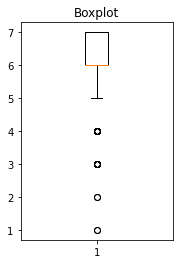

In [542]:
plt.subplot(1,2,1)
plt.boxplot(df_persona.P7)
plt.title('Boxplot')

In [544]:
df_limpo["P23"].describe().to_frame()

,P23
count,962.000000
mean,4.752599
std,1.860683
min,1.000000
25%,5.000000
50%,5.000000
75%,6.000000
max,7.000000


In [515]:
BINS = int(np.sqrt(len(df_0.index)))

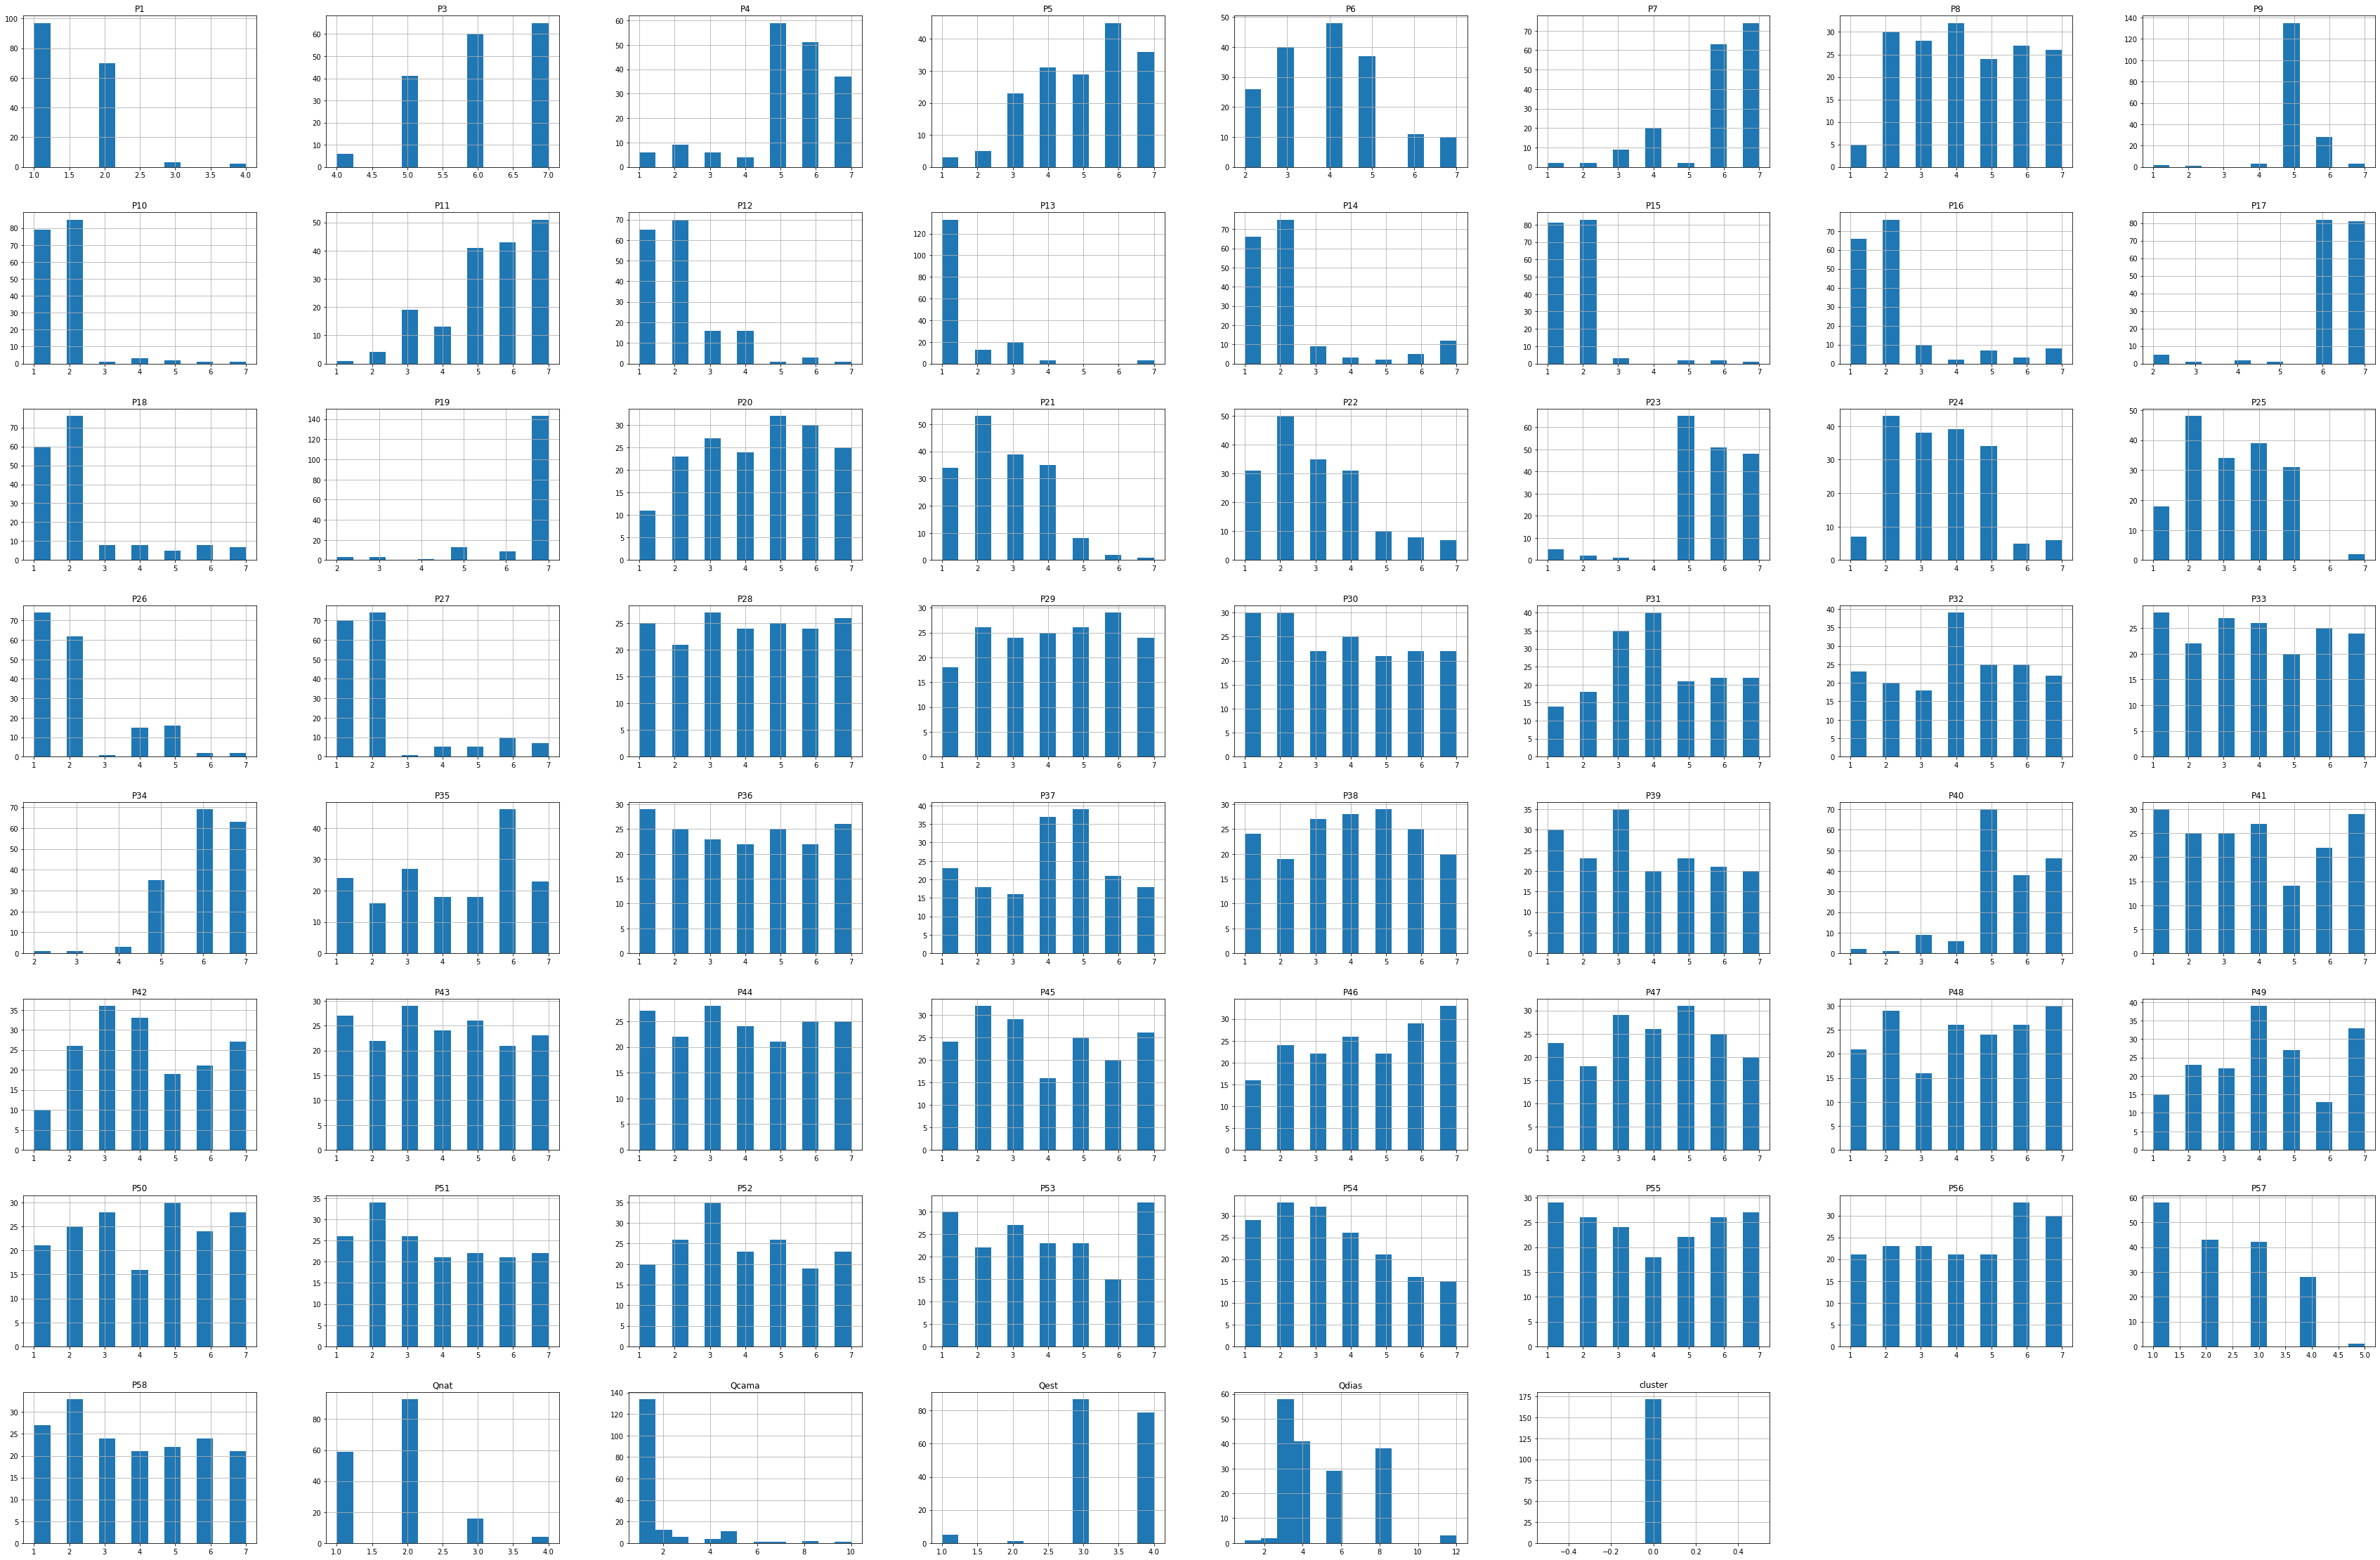

In [532]:
#Plotando histogramas das variáveis quantitativas individualmente para ver seu espaçamento e frequência
df_persona.hist(bins=BINS, figsize=(60,40));

In [529]:
#lista = []
#for i in df_persona:
    #if df_persona[i].astype(float) == True:
       # lista.append(df_persona[i].mean())
    
#lista

In [528]:
df_persona.to_excel("df_persona.xlsx")
